<h1>Alabado, Roderick L.</h1>
<h2>BSIT-3A</h2>

In [59]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
import seaborn as sns


In [2]:
road = pd.read_csv('datasets2\\uk_road_accident.csv')

In [3]:
road


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
road.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Clean the dataset</h2>

In [6]:
road['Latitude'] = road['Latitude'].fillna(road['Latitude'].mean())
road['Longitude'] = road['Longitude'].fillna(road['Longitude'].mean())
road['Road_Surface_Conditions'] = road['Road_Surface_Conditions'].fillna(road['Road_Surface_Conditions'].mode()[0])
road['Road_Type'] = road['Road_Type'].fillna(road['Road_Type'].mode()[0])
road['Urban_or_Rural_Area'] = road['Urban_or_Rural_Area'].fillna(road['Urban_or_Rural_Area'].mode()[0])
road['Weather_Conditions'] = road['Weather_Conditions'].fillna(road['Weather_Conditions'].mode()[0])

In [7]:
road.isnull().sum()


Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>1. What area has the most casualties per accident?</h2>

In [8]:
road['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<H2>Insight#1: Most casualties are reported in urban areas compared to rural places.</H2>

<h2>2. What is the Correlation between casualties and longitude.</h2>

In [9]:
road['Number_of_Casualties'].corr(road['Longitude'])

np.float64(-0.040405645788454514)

<h2>Insight#2: There is almost no relationship between casualties and longitude. This means that whether the accident happens farther east or west doesn’t significantly affect the number of casualties.</h2>

<h2>3. Which type of weather occurs most often? </h2>

In [10]:
road['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight#3: The highest number of accidents occurs under weather conditions of "fine no high winds"</h2>

<h2>4. Which light condition is most often linked to accidents?</h2>

In [11]:
road['Light_Conditions'].value_counts() 


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insight#4: The light condition that is often linked to accidents happen in "daylight".</h2>

<h2>5. Which vehicle type is most involved in accidents?</h2>

In [12]:
road[road['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts().head(5)


Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

<h2>Insight#5: Car was the most frequently involved in accidents.</h2>

<h2>6. Which district has the highest average casualties per accident?</h2>

In [13]:
road.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head(10)

District Area
Blaeu Gwent          1.693694
West Somerset        1.613990
Derwentside          1.606186
Chester-le-Street    1.603306
Durham               1.580431
Blaenau Gwent        1.579310
Fylde                1.569350
Hambleton            1.568523
Merthyr Tydfil       1.568182
West Lancashire      1.566341
Name: Number_of_Casualties, dtype: float64

<h2>Insight#6: The records that have the highest average casualties per accident of District area is Blaeu Gwent at 1.69, indicating that casualties in this district usually affect more people than in other districts.</h2>

<h2>7-9. Which accident severity has the highest average casualties?</h2>

In [14]:
road.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>Insight#7 </h2>
    
<h2>Fatal accidents have the highest average casualties.

With an average of 1.90 casualties per accident, fatal accidents tend to involve more people compared to other severities.</h2>

<h2>Insight#8</h2>
<h3>

Serious accidents average about 1.47 casualties, showing they typically affect more than one person, but still less than fatal cases.</h3>

<h2>Insight#9</h2>
<h3>Slight accidents involve the fewest casualties.

With an average of 1.33 casualties, slight accidents usually affect only one person, reflecting their lower severity and impact compared to serious or fatal crashes.</h3>

<h2>10-12. What is the number of Accident Severity on Single carriageway?</h2>

In [15]:
single_carriageway_accidents = road[road['Road_Type'] == 'Single carriageway']
single_carriageway_accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     419563
Serious     70540
Fatal        6560
Name: count, dtype: int64

<h2>Insight#10</h2>
<h3>Slight accidents are dominant.

Out of all recorded cases, 419,563 are slight accidents, which makes them the most frequent by a large margin.</h3>

<h2>Insight#11</h2>
<h3>Serious accidents are much fewer.

70,540 serious accidents were recorded, showing that while still significant, they occur far less often than slight ones.</h3>

<h2>Insight#12</h2>
<h3>Fatal accidents are rare.

With only 6,560 fatal cases, they make up the smallest share of all accidents on single carriageways, showing that while these roads are prone to frequent accidents, fatalities remain comparatively rare.</h3>

<h2>13. Correlation between casualties and vehicles</h2>

In [16]:
corr_casualties_vehicle = road['Number_of_Casualties'].corr(road['Number_of_Vehicles'])



In [17]:
corr_casualties_vehicle

np.float64(0.22888886126927627)

<h2>Insight#13</h2>

<h3>The correlation between number of casualties and number of vehicles involved is about 0.23, meaning that as the number of vehicles in an accident increases, the number of casualties also tends to rise.</h3>

<h2>14-15. What road type is the most and less involved accident?</h2>

In [18]:
road['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insight#14</h2>
<h3>Single carriageways has most accidents.

With 496,663 cases, single carriageways account for the majority of accidents, far exceeding other road types. This suggests they may be more dangerous due to factors like narrower lanes, opposing traffic, or lack of separation barriers.</h3>

<h2>Insight#15</h2>
<h3>Slip roads show fewer accidents.

Slip roads (7,041) have significantly fewer accidents, possibly due to slower speeds and controlled traffic flow.</h3>

In [19]:
# road['Accident Date'] = pd.to_datetime(road['Accident Date'],dayfirst=True, errors='coerce')

In [27]:
#Create Column for Month,Day, Year

road['Year'] = road['Accident Date'].dt.year
road['Day'] = road['Accident Date'].dt.day
road['Day_Name'] = road['Accident Date'].dt.day_name()
road['Day_of_Week'] = road['Accident Date'].dt.dayofweek
road['Month'] = road['Accident Date'].dt.month


In [28]:
road["Accident Date"] =  road["Accident Date"].fillna(road["Accident Date"] .mode()[0])
road['Month'] =  road['Month'].fillna(road['Month'] .mode()[0])
road['Year'] =  road['Year'].fillna(road['Year'] .mode()[0])
road['Day'] =  road['Day'].fillna(road['Day'] .mode()[0])
road['Day_Name'] =  road['Day'].fillna(road['Day_Name'] .mode()[0])
road['Day_of_Week'] =  road['Day_of_Week'].fillna(road['Day_of_Week'] .mode()[0])
road['Month'] = road['Month'].astype('category') 

In [22]:
# #CREATING NEW COLUMN FOR YEAR,MONTH,DAY,DAYOFWEEK
# road['Accident Date'] = (
#     road['Accident Date']
#     .astype(str)               
#     .str.replace('/', '-', regex=False) 
#     .str.strip()                   
# )
# road['Accident Date'].replace('nan', pd.NA, inplace=True)

# road['Accident Date'] = pd.to_datetime(
#     road['Accident Date'], 
#     dayfirst=True, 
#     errors='coerce'
# )
# road['Year'] = road['Accident Date'].dt.year
# road['Month'] =  road['Accident Date'].dt.month
# road['Day'] =  road['Accident Date'].dt.day
# road['DayOfWeek'] =  road['Accident Date'].dt.dayofweek

<h2>16-18. In which month does accident happen the most per detrict area?</h2>

In [23]:
month_acc = road.groupby(['District Area','Month'])['Number_of_Casualties'].size().unstack()
month_acc.head(12)

Month,1,2,3,4,5,6,7,8,9,10,11,12
District Area,,,,,,,,,,,,
Aberdeen City,92,120,114,90,123,111,112,118,103,121,113,106
Aberdeenshire,149,133,171,134,161,187,170,170,150,165,171,169
Adur,58,41,53,58,58,58,51,48,43,53,59,39
Allerdale,89,85,82,86,101,89,91,114,93,107,90,101
Alnwick,23,25,14,17,16,18,16,25,18,23,18,19
Amber Valley,116,100,116,98,97,120,127,119,123,124,106,101
Angus,64,89,55,53,70,71,58,51,73,61,87,64
Argyll and Bute,53,58,58,63,73,73,78,95,89,77,56,63
Arun,110,100,104,121,125,113,136,90,125,137,102,113


<h2>Insight#16 </h2>
<h3>Seasonal Pattern in Accidents.

Many districts (Aberdeenshire and Aylesbury Vale) show higher accident counts in December compared to earlier months, suggesting that winter months may have more accidents due to weather conditions like snow, ice, or reduced daylight.</h3>

<h2>Insight#17</h2>
<h3>District Variation.

Accident frequencies differ by district. For example, Aberdeenshire records consistently higher accident counts across all months (ranging from ~49 to 79), while smaller districts like Adur have much lower counts (14–27). This shows that both population density and road activity strongly influence accident numbers.</h3>

<h2>Insight#18</h2>
<h3>Mid-Year Stability vs. End-Year Spike.

Several districts (Amber Valley, Ashford) show relatively stable accident numbers from April to August, followed by noticeable increases in November–December. This pattern suggests that accident rates are more stable in mid-year months but rise toward year-end.</h3>

<h2>19-20. In what day of the week record the highest and lowest number of road acccidents?</h2>

In [29]:
day_weeks = road['Day_of_Week'].value_counts()
day_weeks

Day_of_Week
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<h2>Insight#19</h2>
<h3>Friday has the highest accidents.

Day 5 (Friday) recorded 43,836 accidents, the most among all days. This likely reflects increased traffic from commuters heading into the weekend and higher evening social activity.</h3>

<h2>Insight#20</h2>
<h3>Sunday has the lowest accidents.

Day 0 (Sunday) recorded only 28,564 accidents, the fewest. This suggests lighter traffic volumes on Sundays reduce the likelihood of accidents compared to weekdays.</h3>

<h2>21-22. Which light condition records the highest number of accidents?</h2>

In [ ]:
light_accidents = road['Light_Conditions'].value_counts()
light_accidents


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
light_accidents.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Number of Accidents by Light Condition")
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()

<h2>Insight#21</h2>
<h3>Daylight conditions account for the highest number of accidents, which is expected since most vehicles are on the road during daytime.</h3>

<h2>Insight#22</h2>
<h3>Darkness without street lights has the fewest accidents, likely because drivers avoid unlit areas at night.</h3>

<h2>23-24. How does urban or rural area condition affect accidents?</h2>

In [ ]:
# Count accidents by Urban or Rural
urban_rural = road['Urban_or_Rural_Area'].value_counts()
urban_rural



In [ ]:

urban_rural = road['Urban_or_Rural_Area'].value_counts()
urban_rural = urban_rural[urban_rural.index != 'Unallocated']  # remove Unallocated


urban_rural.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(6,6), 
    startangle=90, 
    colors=['skyblue','orange']
)
plt.title("Urban vs Rural Accidents")
plt.ylabel("")
plt.show()



<h2>Insight#23:
Urban areas account for the majority of accidents (63.8%), showing that higher traffic density and congestion contribute to more frequent collisions.</h2>

<h2>Insight#24:  Rural areas still represent a significant 36.2%, indicating that despite lower traffic volumes, factors like higher speeds and less roadside infrastructure increase accident risks.</h2>

<h2>25-26. How does the number of vehicles involved affect the number of casualties?</h2>

In [ ]:
vehicles_casualties = road.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
vehicles_casualties


In [ ]:
plt.figure(figsize=(7,5))
vehicles_casualties.plot(kind='line', marker='o', color='teal')

plt.title("Average Casualties vs Vehicles Involved")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Average Number of Casualties")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<h2>Insight#25: Accidents with only one vehicle usually have fewer casualties, suggesting they are often single-driver incidents.</h2>

<h2>Insight#26: As more vehicles are involved, the average number of casualties increases, showing that multi-vehicle accidents tend to be more severe.</h2>

In [31]:
road['District Area'].value_counts().head(6)

District Area
Birmingham     13491
Leeds           8898
Manchester      6720
Bradford        6212
Sheffield       5710
Westminster     5706
Name: count, dtype: int64

In [43]:
for i in road['District Area'].unique(): 
    print(i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h1>Insight#27 OXFORD DATA VISUALIZATION</h1>
<img src='"C:\Users\63968\Downloads\bbo-th-location-image-1-1.jpg"'/>

In [51]:
oxford_road = road[road['District Area'] == 'Oxford']

<h2>1. Monthly Road Accidents by year in Oxford</h2>

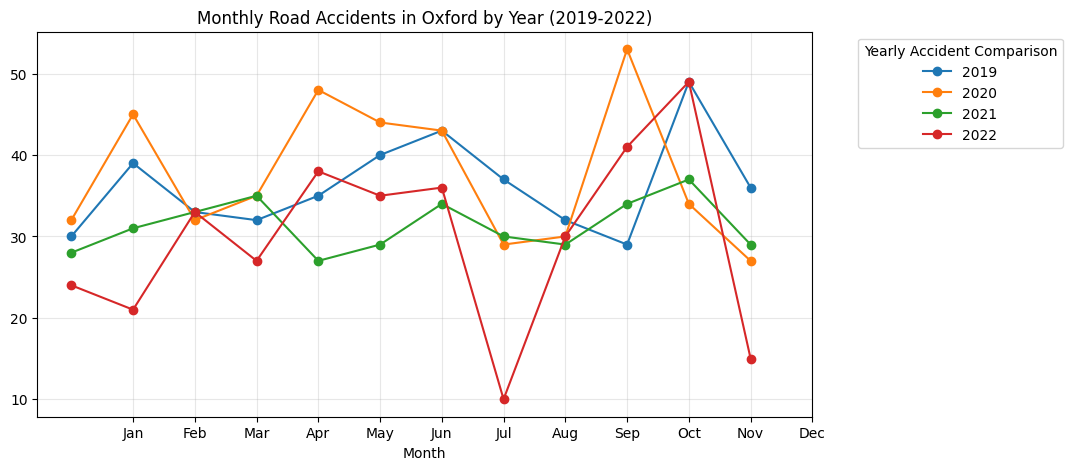

In [55]:
monthly_oxdata = oxford_road.groupby(['Year', 'Month']).size()

monthly_oxdata = monthly_oxdata.unstack(level=0)

monthly_oxdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Oxford by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>2.Accidents per Year</h2>
<h2>3.Accidents per Month</h2>
<h2>4.Accidents per Day</h2>

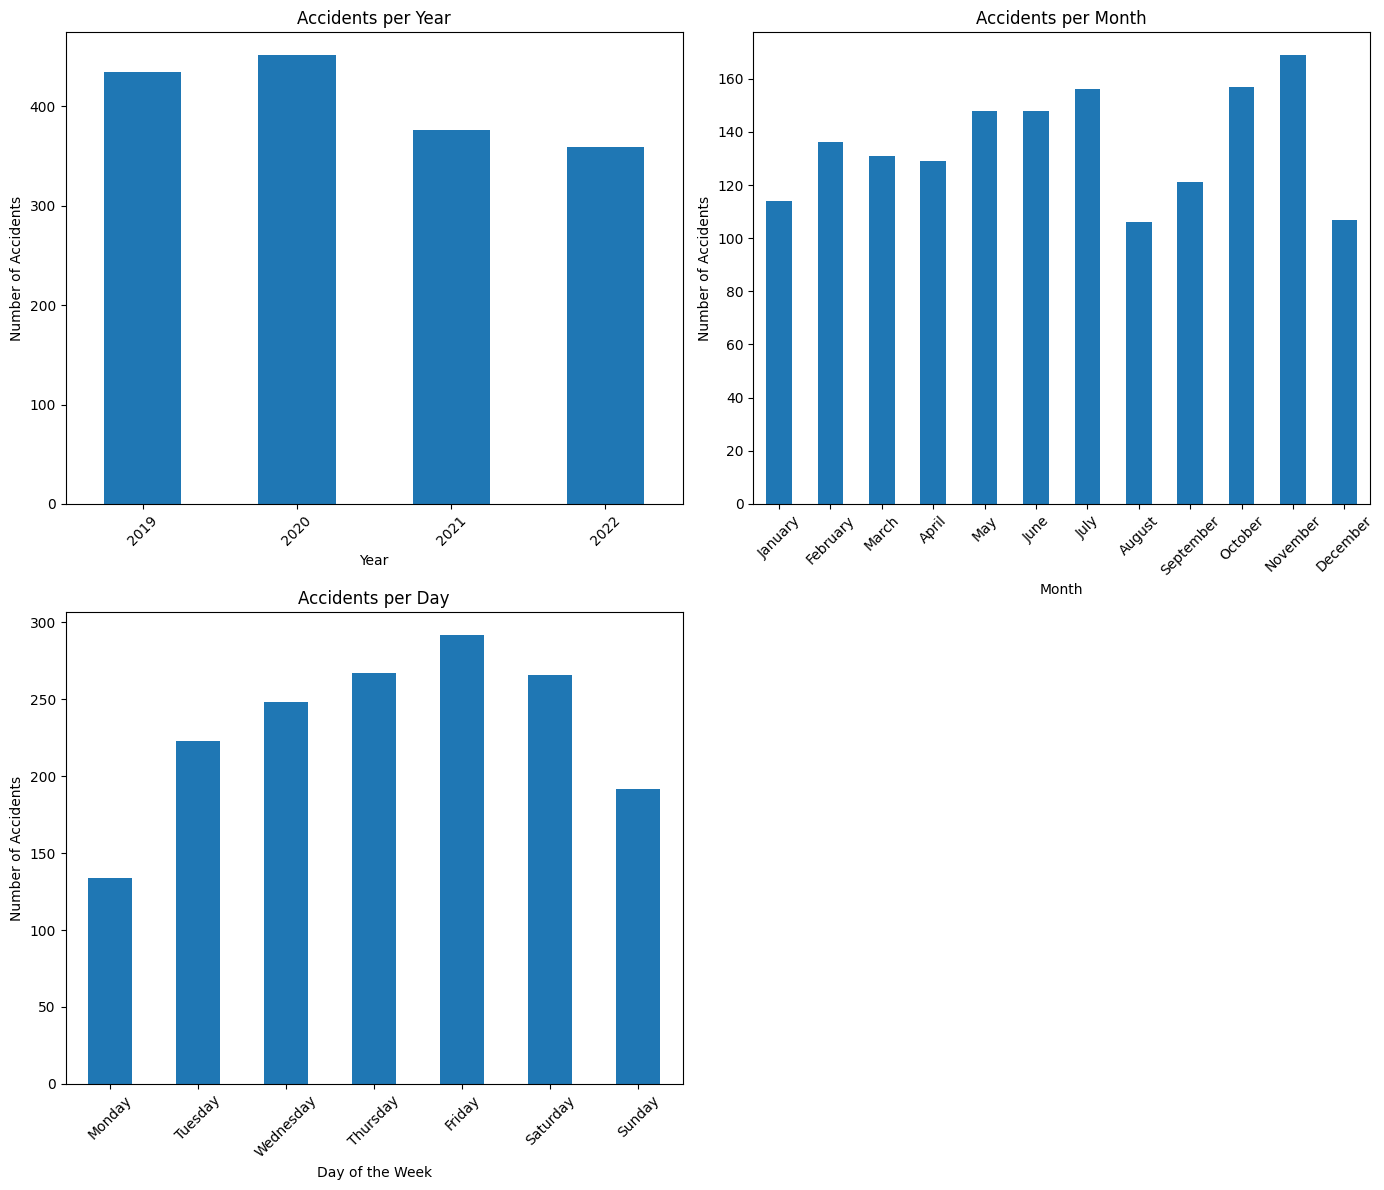

In [54]:
# Accidents per year
accidents_per_year = oxford_road['Year'].value_counts().sort_index()
accidents_per_month = oxford_road['Month'].value_counts().sort_index()
accidents_per_day = oxford_road['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
plt.subplot(2, 2, 1) # this just makes the pie plot next to each others by specifying which rows and columns to put it in and in what order (rows, cols, position(order)).
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) # It just make the x-labels slightly bent so that it can be read more easily

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

#PER MONTH
# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

plt.subplot(2, 2, 2)
accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

#PER DAY
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

plt.subplot(2, 2, 3)
accidents_per_day.index = accidents_per_day.index.map(day_names) # To make the labels in the Accident Per Days be Monday-Sunday instead of numbers.
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.gcf().set_size_inches(14, 12)
plt.tight_layout()
plt.show()


<h2>5. Accident Severity</h2>

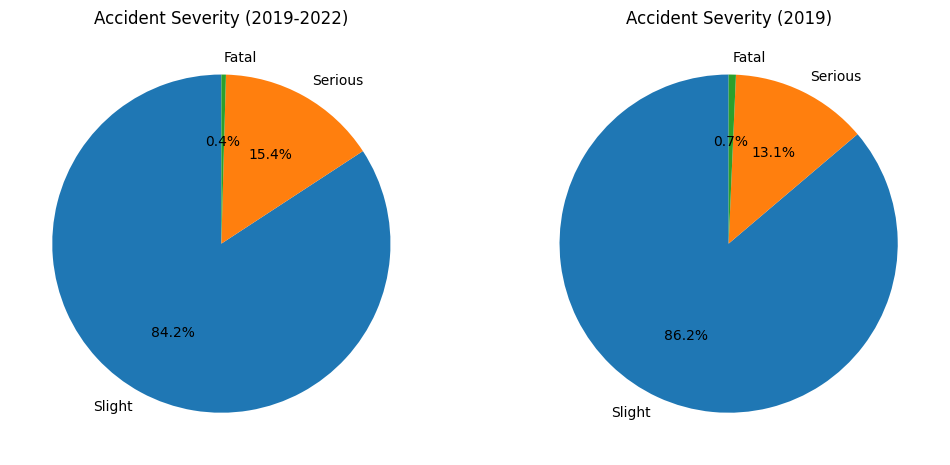

In [57]:
# Pie chart for all years
plt.subplot(1, 2, 1) # this just makes the pie plot next to each others by specifying which rows and columns to put it in and in what order (rows, cols, position(order)).
severity_oxford = oxford_road['Accident_Severity'].value_counts()
plt.pie(severity_oxford,
        labels=severity_oxford.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019-2022)')

# Pie chart for 2019
plt.subplot(1, 2, 2)
severity_2019_oxford = oxford_road[oxford_road['Year'] == 2019]
lsc_2019 = severity_2019_oxford['Accident_Severity'].value_counts()
plt.pie(lsc_2019,
        labels=lsc_2019.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019)')

plt.gcf().set_size_inches(12, 6)  # To make it wider
# plt.tight_layout() # this just adds enough padding to make everything fit cleanly
plt.show()


<h2>6. Map Location using folium(Heatmap)</h2>

In [60]:
oxford_locations  = list(zip(oxford_road['Latitude'], oxford_road['Longitude']))
oxford_map = folium.Map(location=[oxford_road['Latitude'].mean(), oxford_road['Longitude'].mean()], zoom_start=12)
HeatMap(oxford_locations).add_to(oxford_map)

oxford_map